In [1]:
#Basic imports
import numpy as np
import pandas as pd

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.cluster import DBSCAN

#matpotlib import
import matplotlib.pyplot as plt

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [7]:
df = pd.read_csv('./INSECTS-abrupt_balanced_norm.csv')
df['class'] = LabelEncoder().fit_transform(df['class'])
y = df.pop('class')

In [8]:
df = pd.DataFrame(PCA(n_components=2).fit_transform(df),columns=['pc1','pc2'])
df['class'] = y

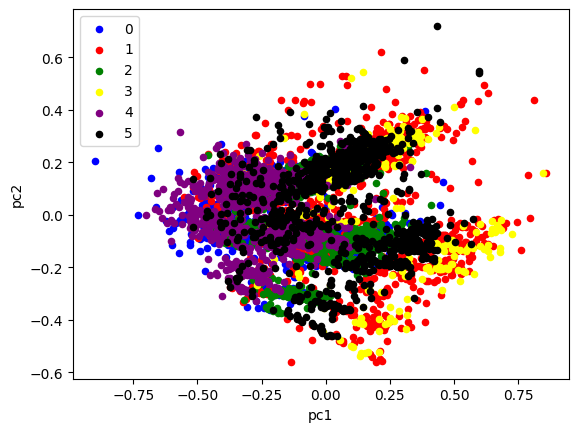

In [11]:
ax = plt.subplot(1,1,1)
grouped = df[0:5000].groupby('class')
colors = {0 : 'blue', 1 : 'red', 2 : 'green' , 3 : 'yellow' , 4 : 'purple', 5 : 'black', 6 : 'orange', 7 : 'cyan'}
for key,group in grouped :
     group.plot(ax = ax,x='pc1',y='pc2',kind="scatter",label = key,color=colors[key])
